In [1]:
from youtubesearchpython import Video
from copy import deepcopy

In [2]:
# read vid_ids.txt lines to get intial set of urls
with open('vid_ids.txt', 'r') as f:
    lines = f.readlines()
unexplored_videos = ['https://www.youtube.com/watch?v=' + line[:-1] for line in lines]
all_videos = set(deepcopy(unexplored_videos))
channels = set()

video_file = open('videos.jsonl', 'w')

In [3]:
link = unexplored_videos.pop()
new_channels_explored = []
total_videos_found = len(all_videos)
playlists = []

while len(unexplored_videos) > 0:
    # use a try block to catch request or parsing errors and skip to next video
    try:
        next_info = Video.getNextInfo(link)
        recommendations = next_info['recommendations']
        assert len(recommendations) > 0, f'no recommendations for {link}'

        new_channels = 0
        for recommendation in recommendations:
            # add to unexplored_videos if not already in channels (to stop repeat videos)
            if recommendation['channel']['link'] not in channels:
                channels.add(recommendation['channel']['link'])
                unexplored_videos.append(recommendation['link'])
                new_channels += 1

            if recommendation['isPlaylist'] is True:
                playlists.append(recommendation)
                continue

            total_videos_found += 1
            all_videos.add(recommendation['link'])
            video_file.write(str(recommendation) + '\n')
    except Exception as e:
        print(e, link)
        link = unexplored_videos.pop()
        continue

    new_channels_explored.append(new_channels)
    link = unexplored_videos.pop()
    print(
        "channels found:", len(channels),
        "unexplored videos left:", len(unexplored_videos),
        "total unique videos found:", len(all_videos),
        "total videos found:", total_videos_found,
        end = '\t\t\t\r'
    )

substring not found https://www.youtube.com/shorts/-2Xga8AGeYo videos found: 22068 total videos found: 22228			
substring not found https://www.youtube.com/shorts/bSwPOUVNs5U videos found: 22109 total videos found: 22276			
substring not found https://www.youtube.com/shorts/a8fj22KkbpY videos found: 22132 total videos found: 22312			
substring not found https://www.youtube.com/shorts/b6b6qwnU6-g videos found: 22175 total videos found: 22396			
substring not found https://www.youtube.com/shorts/ZO0tZ0YrqWs videos found: 22182 total videos found: 22408			
substring not found https://www.youtube.com/shorts/xAlVJyQLZsU
substring not found https://www.youtube.com/shorts/UzY55WKEAbk
substring not found https://www.youtube.com/shorts/UUPD1E_Vmj0 videos found: 22328 total videos found: 22587			
substring not found https://www.youtube.com/shorts/LimiScacvDwe videos found: 26465 total videos found: 28237			
substring not found https://www.youtube.com/shorts/7jo4jaEDDvU
substring not found https:

KeyboardInterrupt: 

In [ ]:
# we start with roughly 21k of unexplored videos

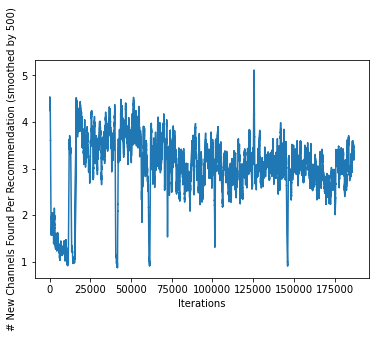

In [18]:
import numpy as np
from matplotlib import pyplot as plt

def moving_average(a, n=3):
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

plt.plot(moving_average(new_channels_explored, 500))
plt.xlabel('Iterations')
plt.ylabel('# New Channels Found Per Recommendation (smoothed by 500)')
plt.show()

In [10]:
channels.remove(None)

In [11]:
# close videos.jsonl
video_file.close()

In [12]:
# write channels to channels.txt
with open('channels.txt', 'w') as f:
    for channel in channels:
        f.write(channel + '\n')